# COVID-19 Argentina por RJC

In [1]:
import os              # This provides several system utilities
import pandas as pd    # This is the workhorse of data munging in Python
import matplotlib.pyplot as plt
import seaborn as sns  # This allows us to easily and beautifully plot

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

### Abro archivo con los datos del gobierno, Tasa diaria de contagios y muertos, total de recuperados y de tests

In [2]:
f = 'BD/Covid19_Arg.txt'    # Path to file containing the file
df = pd.read_csv(f, comment='#')    # Read csv file with comma sepparation
df.tail(10)

,Fecha,Contagios,Muertos,Recuperados_tot,Tests
651,12/16/2021,5301,19,5225452.0,26897346.0
652,12/17/2021,5648,18,5228552.0,26961711.0
653,12/18/2021,4163,7,5230733.0,27005746.0
654,12/19/2021,3254,4,5233769.0,27035741.0
655,12/20/2021,5337,27,5237599.0,27082573.0
656,12/21/2021,9336,24,5240512.0,27153617.0
657,12/22/2021,11121,11,5243498.0,27221412.0
658,12/23/2021,13456,15,5248682.0,27302336.0
659,12/24/2021,16279,29,5253705.0,27397741.0
660,12/25/2021,7183,12,5259080.0,27433892.0


### Separo por comas y indexto los dias a la tabla para graficar facilmente

In [3]:
df.set_index(pd.DatetimeIndex(df['Fecha']),inplace=True)
df.drop('Fecha', axis=1, inplace=True)
#df['Recuperados_tot'] = pd.to_numeric(df['Recuperados_tot'])

df.tail(10) #ultimos 10 valores

,Contagios,Muertos,Recuperados_tot,Tests
Fecha,,,,
2021-12-16,5301,19,5225452.0,26897346.0
2021-12-17,5648,18,5228552.0,26961711.0
2021-12-18,4163,7,5230733.0,27005746.0
2021-12-19,3254,4,5233769.0,27035741.0
2021-12-20,5337,27,5237599.0,27082573.0
2021-12-21,9336,24,5240512.0,27153617.0
2021-12-22,11121,11,5243498.0,27221412.0
2021-12-23,13456,15,5248682.0,27302336.0
2021-12-24,16279,29,5253705.0,27397741.0


### Calculo la tasa diaria de recuperados, activos y tests

In [4]:
df['Recuperados'] = df['Recuperados_tot'].diff()
df['Tests_diario'] = df['Tests'].diff()
df['Activos']=df['Contagios']-df['Recuperados']-df['Muertos']
df['Activos'] = pd.to_numeric(df['Activos'])
df.tail(10)

,Contagios,Muertos,Recuperados_tot,Tests,Recuperados,Tests_diario,Activos
Fecha,,,,,,,
2021-12-16,5301,19,5225452.0,26897346.0,3239.0,60675.0,2043.0
2021-12-17,5648,18,5228552.0,26961711.0,3100.0,64365.0,2530.0
2021-12-18,4163,7,5230733.0,27005746.0,2181.0,44035.0,1975.0
2021-12-19,3254,4,5233769.0,27035741.0,3036.0,29995.0,214.0
2021-12-20,5337,27,5237599.0,27082573.0,3830.0,46832.0,1480.0
2021-12-21,9336,24,5240512.0,27153617.0,2913.0,71044.0,6399.0
2021-12-22,11121,11,5243498.0,27221412.0,2986.0,67795.0,8124.0
2021-12-23,13456,15,5248682.0,27302336.0,5184.0,80924.0,8257.0
2021-12-24,16279,29,5253705.0,27397741.0,5023.0,95405.0,11227.0


### Calculo el total de contagios, muertos y activos

In [5]:
df['Contagios_tot'] = df['Contagios'].cumsum()
df['Muertos_tot'] = df['Muertos'].cumsum()
df['Activos_tot']=df['Contagios_tot']-df['Recuperados_tot']-df['Muertos_tot']

pd.options.display.float_format = '{:,.0f}'.format #en enteros sin coma
df.tail(10)

,Contagios,Muertos,Recuperados_tot,Tests,Recuperados,Tests_diario,Activos,Contagios_tot,Muertos_tot,Activos_tot
Fecha,,,,,,,,,,
2021-12-16,5301,19,"5,225,452","26,897,346","3,239","60,675","2,043",5377462,117035,"34,975"
2021-12-17,5648,18,"5,228,552","26,961,711","3,100","64,365","2,530",5383110,117053,"37,505"
2021-12-18,4163,7,"5,230,733","27,005,746","2,181","44,035","1,975",5387273,117060,"39,480"
2021-12-19,3254,4,"5,233,769","27,035,741","3,036","29,995",214,5390527,117064,"39,694"
2021-12-20,5337,27,"5,237,599","27,082,573","3,830","46,832","1,480",5395864,117091,"41,174"
2021-12-21,9336,24,"5,240,512","27,153,617","2,913","71,044","6,399",5405200,117115,"47,573"
2021-12-22,11121,11,"5,243,498","27,221,412","2,986","67,795","8,124",5416321,117126,"55,697"
2021-12-23,13456,15,"5,248,682","27,302,336","5,184","80,924","8,257",5429777,117141,"63,954"
2021-12-24,16279,29,"5,253,705","27,397,741","5,023","95,405","11,227",5446056,117170,"75,181"


### Interpolaciones

In [6]:
import numpy as np
N=7
df["Contagios_MA"]=df.Contagios.rolling(window=N).mean()
df["Recuperados_MA"]=df.Recuperados.rolling(window=N).mean()
df["Muertos_MA"]=df.Muertos.rolling(window=N).mean()
df["Tests_diario_MA"]=df.Tests_diario.rolling(window=N).mean()

### Grafico de tasa diaria

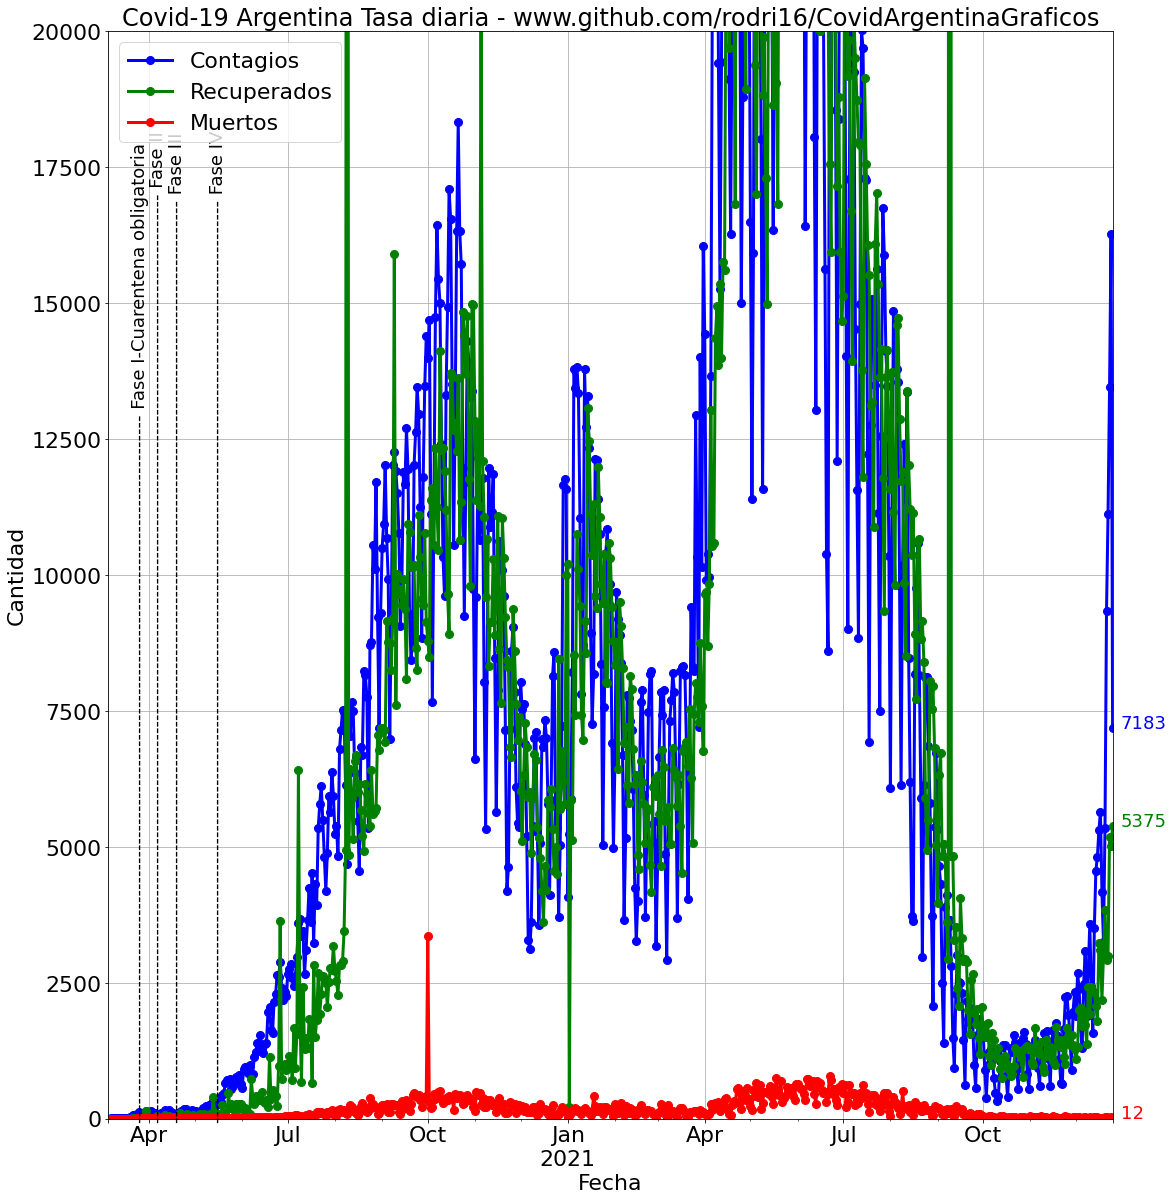

In [7]:
ax=df.plot(y=['Contagios','Recuperados','Muertos'], color=['blue',"green",'red'],legend='true',style='-',grid='on',figsize=(18,20),linewidth=3, marker='o', markersize=8, fontsize=22)

plt.title('Covid-19 Argentina Tasa diaria - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)
plt.legend(['Contagios', 'Recuperados',"Muertos"],loc='upper left', fontsize=22);
plt.ylabel('Cantidad', fontsize=22)
plt.xlabel('Fecha', fontsize=22)
#ax.text('2020-4-2',280,'https://github.com/rodri16/CovidArgentinaGraficos',fontsize=10)
#agrega ultimo numero
#for var in (df.Contagios,df.Recuperados,df.Muertos):
#    plt.annotate('%d' % var.iloc[-1], xy=(1, var.iloc[-1]), xytext=(8, 0), 
#                 xycoords=('axes fraction', 'data'), textcoords='offset points')
    
plt.annotate('%d' % df.Contagios.iloc[-1], xy=(1, df.Contagios.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',color='blue',size=18)
plt.annotate('%d' % df.Recuperados.iloc[-1], xy=(1, df.Recuperados.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',color='green',size=18)
plt.annotate('%d' % df.Muertos.iloc[-1], xy=(1, df.Muertos.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',color='red',size=18)

    # Add labels to the plot
style = dict(size=18, color='black')    
#Texto de la cuarentena obligatoria
ax.text('2020-3-20', 10, "------------------------------------------------------------------------------------------------------------- Fase I-Cuarentena obligatoria",rotation=90, **style)
#Texto de la Fase II
ax.text('2020-4-1', 10, "----------------------------------------------------------------------------------------------------------------------------------------------- Fase II",rotation=90, **style)
#Texto de la Fase III
ax.text('2020-4-13', 10, "---------------------------------------------------------------------------------------------------------------------------------------------- Fase III",rotation=90, **style)
#Texto de la Fase IV
ax.text('2020-5-10', 10, "---------------------------------------------------------------------------------------------------------------------------------------------- Fase IV",rotation=90, **style)


#valor minimo eje y = 0
plt.gca().set_ylim(bottom=0,top=20000)


#Salvo el grafico con la ultima fecha
name='Graficos/2021/Diciembre/TasaDiariaLine_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name, bits=16)

### Subolots con la media de cada grafico

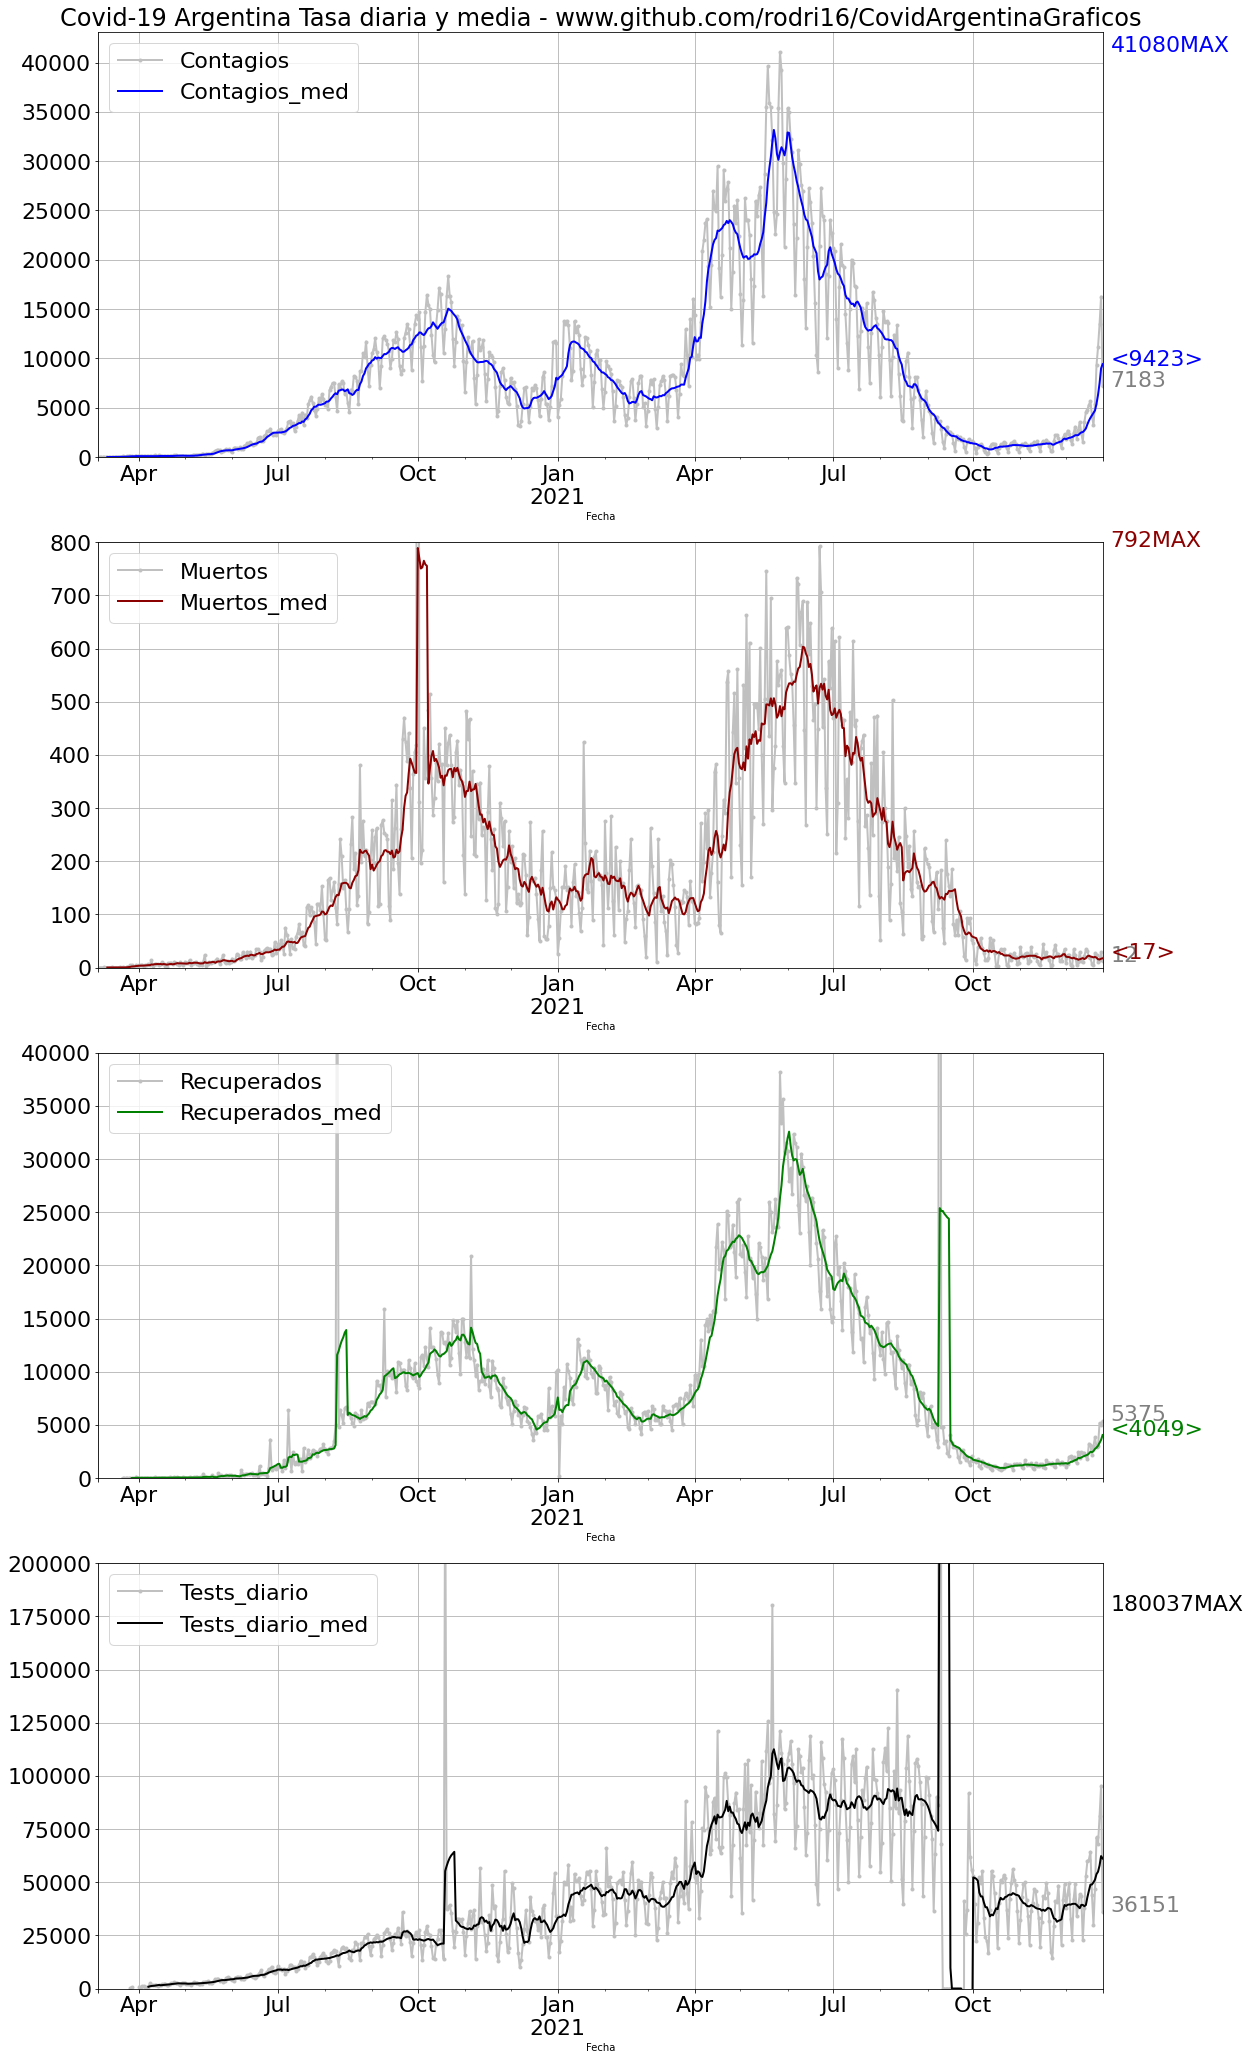

In [8]:
fig, axs = plt.subplots(4,1)

#ax=df.plot(y=['Contagios','Contagios_MA','Muertos','Recuperados','Tests_diario'],color=['blue','red',"green",'grey'],figsize=(18,22),subplots='true',style='.-',grid='on',linewidth=2, marker='o', fontsize=22)#df[df['Contagios_tot'] > 100]
#plt.xlabel('Fecha', fontsize=24)

df.plot(y=['Contagios','Contagios_MA'],color=['silver','blue'],figsize=(18,36),style=['.-',''],grid='on',linewidth=2, fontsize=22,ax=axs[0])
axs[0].set_title('Covid-19 Argentina Tasa diaria y media - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)

axs[0].annotate('%d' % df.Contagios.iloc[-1], xy=(1, df.Contagios.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="grey")  
axs[0].set_ylim(bottom=0)
axs[0].legend(['Contagios','Contagios_med'],fontsize=22,loc='upper left')
axs[0].annotate('%dMAX' % df.Contagios.max(), xy=(1, df.Contagios.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="blue")
axs[0].annotate('<%d>' % df.Contagios_MA.iloc[-1], xy=(1, df.Contagios_MA.iloc[-1]*0.99), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="blue")

df.plot(y=['Muertos','Muertos_MA'],color=['silver','Darkred'],figsize=(18,36),style=['.-','-'],grid='on',linewidth=2, fontsize=22,ax=axs[1])
axs[1].annotate('%d' % df.Muertos.iloc[-1], xy=(1, df.Muertos.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="grey") 
axs[1].set_ylim(bottom=0,top=800)
axs[1].legend(['Muertos','Muertos_med'],fontsize=22,loc='upper left')

axs[1].annotate("792MAX", xy=(1, 792), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="darkred")
axs[1].annotate('<%d>' % df.Muertos_MA.iloc[-1], xy=(1, df.Muertos_MA.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="darkred") 


df.plot(y=['Recuperados','Recuperados_MA'],color=['silver','green'],figsize=(18,36),style=['.-','-'],grid='on',linewidth=2, fontsize=22,ax=axs[2])
axs[2].annotate('%d' % df.Recuperados.iloc[-1], xy=(1, df.Recuperados.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="grey") 
axs[2].set_ylim(bottom=0,top=40000)
axs[2].legend(['Recuperados','Recuperados_med'],fontsize=22,loc='upper left')
axs[2].annotate('<%d>' % df.Recuperados_MA.iloc[-1], xy=(1, df.Recuperados_MA.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="green") 

df.plot(y=['Tests_diario','Tests_diario_MA'],color=['silver','black'],figsize=(18,36),style=['.-','-'],grid='on',linewidth=2, fontsize=22,ax=axs[3])

axs[3].annotate('%d' % df.Tests_diario.iloc[-1], xy=(1, df.Tests_diario.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="grey") 
axs[3].set_ylim(bottom=0, top=200000)
axs[3].legend(['Tests_diario','Tests_diario_med'],fontsize=22,loc='upper left')
#axs[3].annotate('<%d>' % df.Tests_diario_MA.iloc[-1], xy=(1, df.Tests_diario_MA.iloc[-1]), xytext=(8, 0), 
#                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="black") 
axs[3].annotate("180037MAX", xy=(1, 178000), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="black")

name='Graficos/2021/Diciembre/TasaDiaria_MA_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Grafico de barras de los tests diarias

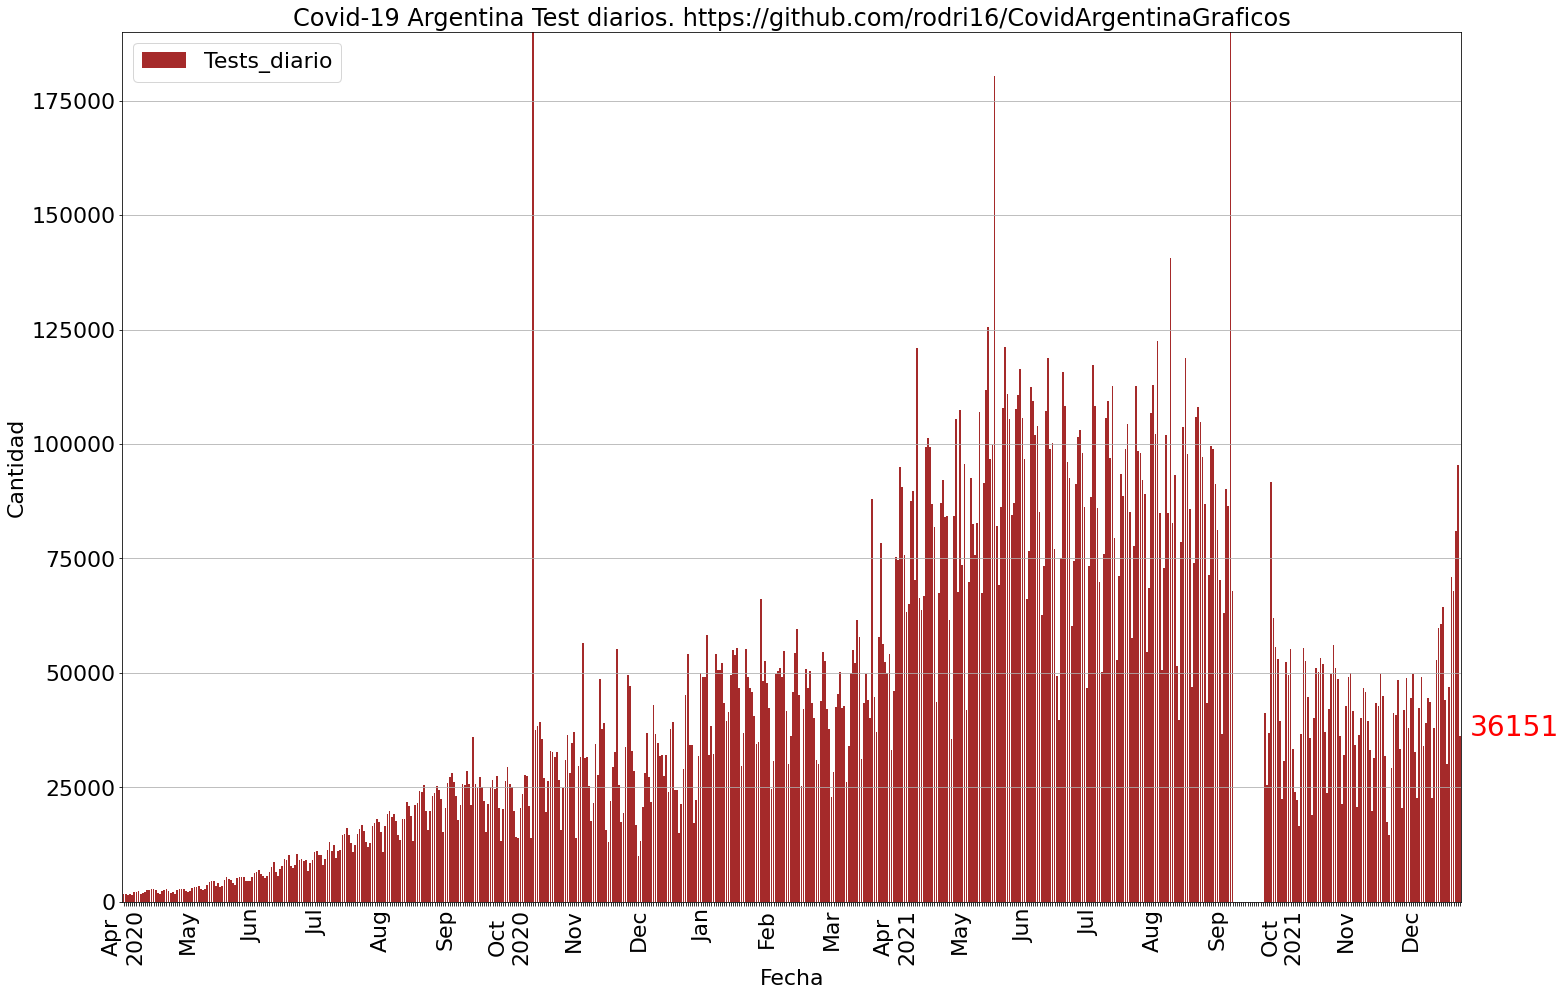

In [9]:
ax=df[df.index > '2020-4-10'].Tests_diario.plot.bar(color=['brown'],width=0.8, legend='true',figsize=(24,16), fontsize=22)

#arreglo el formato de la fecha
#plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df[df.index > '2020-4-10'].index.to_series().dt.strftime("%d %b")))#arregla la fecha

# Make most of the ticklabels empty so the labels don't get too crowded
import matplotlib.ticker as ticker
ticklabels = ['']*len(df[df.index > '2020-4-10'].index)
# Every 7th ticklable shows the month and day
ticklabels[::30] = [item.strftime('%b') for item in df[df.index > '2020-4-10'].index[::30]]
# Every 35th ticklabel includes the year
ticklabels[::180] = [item.strftime('%b\n%Y') for item in df[df.index > '2020-4-10'].index[::180]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

#agrego grid
plt.grid(axis='y')
plt.legend(fontsize=22,loc='upper left')
plt.xlabel('Fecha',fontsize=22)
plt.title('Covid-19 Argentina Test diarios. https://github.com/rodri16/CovidArgentinaGraficos',fontsize=24)
plt.ylabel('Cantidad', fontsize=22)
plt.gca().set_ylim(bottom=0, top=190000)

#numeros arriba de la barra
#for p in ax.patches:
#    ax.annotate(int(p.get_height()), (p.get_x() * 0.995, p.get_height() * 1.009),rotation=90, fontsize=18)

#ultimo numero
plt.annotate('%d' % df.Tests_diario.iloc[-1], xy=(1, df.Tests_diario.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',color='red',size=28)

    #salvo grafico
name='Graficos/2021/Diciembre/TestDiarioBar_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Grafico Totales (el mas completo!!)

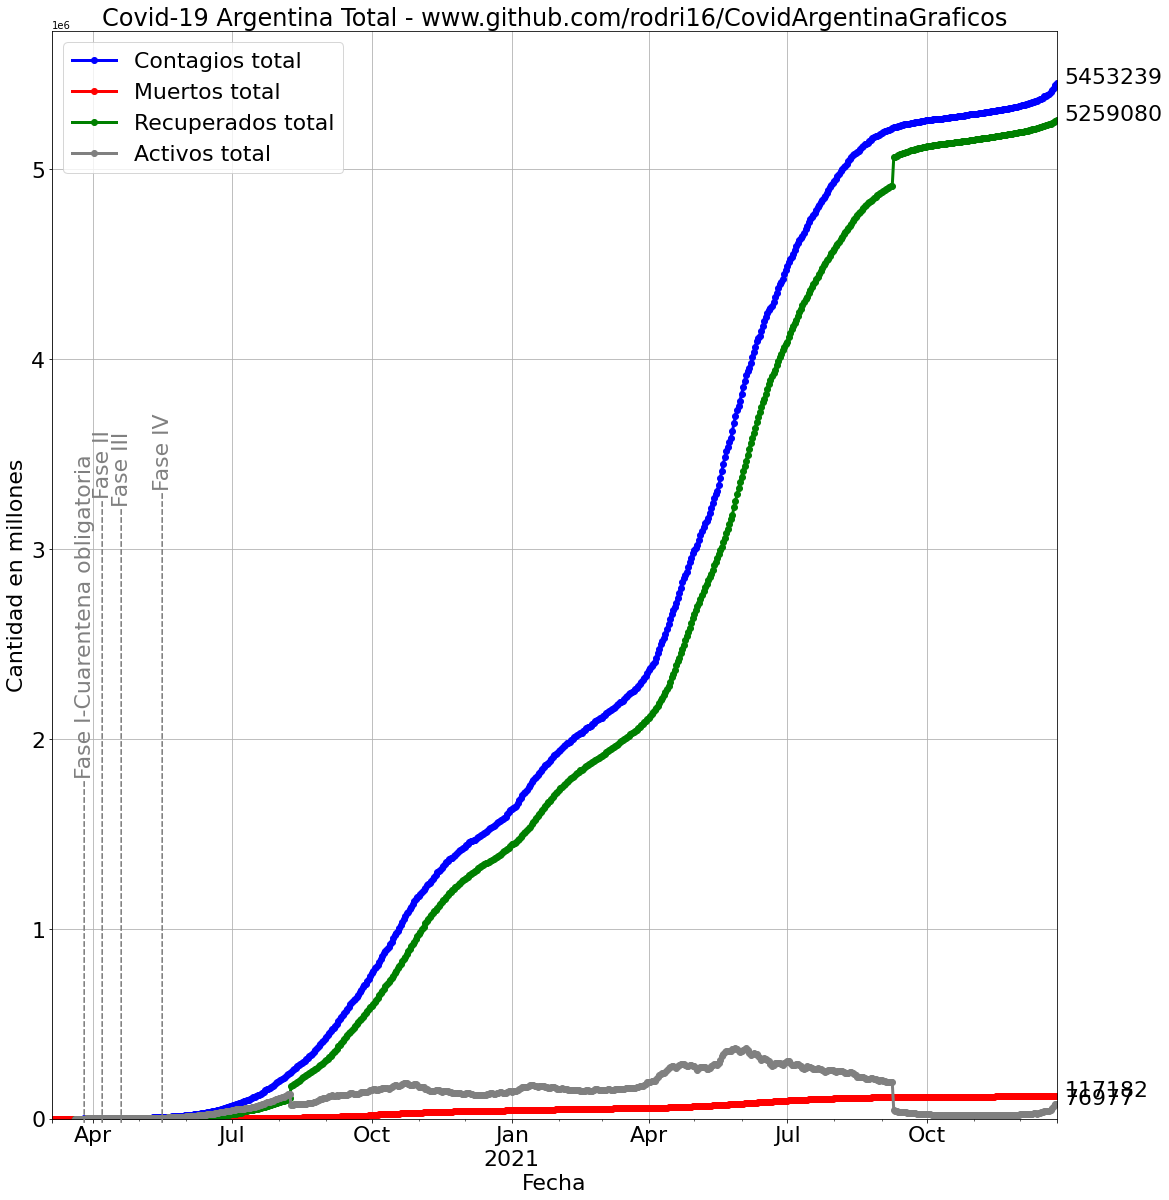

In [10]:
import matplotlib.ticker as mticker
ax=df.plot(y=['Contagios_tot','Muertos_tot','Recuperados_tot',"Activos_tot"],color=['blue','red',"green",'grey'],fontsize=22, style='-',grid='on',figsize=(18,20),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)
plt.xlabel('Fecha', fontsize=22)
plt.ylabel('Cantidad en millones', fontsize=22)
plt.legend(['Contagios total','Muertos total','Recuperados total',"Activos total"],loc='upper left', fontsize=22);
#ax.text('2020-4-2',5800,'www.github.com/rodri16/CovidArgentinaGraficos',fontsize=10)

#agrega ultimo valor
for var in (df.Contagios_tot,df.Muertos_tot,df.Recuperados_tot):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22)

plt.annotate('%d' % df.Activos_tot.iloc[-1], xy=(1, df.Activos_tot.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22)   
# Add labels to the plot
style = dict(size=22, color='gray')

#Texto de la cuarentena obligatoria
ax.text('2020-3-20', 10, "-------------------------------------------Fase I-Cuarentena obligatoria",rotation=90, **style)
#Texto de la Fase II
ax.text('2020-4-1', 10, "------------------------------------------------------------------------------Fase II",rotation=90, **style)
#Texto de la Fase III
ax.text('2020-4-13', 10, "-----------------------------------------------------------------------------Fase III",rotation=90, **style)
#Texto de la Fase IV
ax.text('2020-5-10', 10, "-------------------------------------------------------------------------------Fase IV",rotation=90, **style)

#ax.set_facecolor("black")
#valor minimo en y = 0
plt.gca().set_ylim(bottom=0)

name='Graficos/2021/Diciembre/Contagios_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name, bits=16)

### Grafico de totales igual al anterior pero en escala logaritmica, se pueden ver un poco mejor lo valores chicos con respecto a los grandes pero es un poco tricky

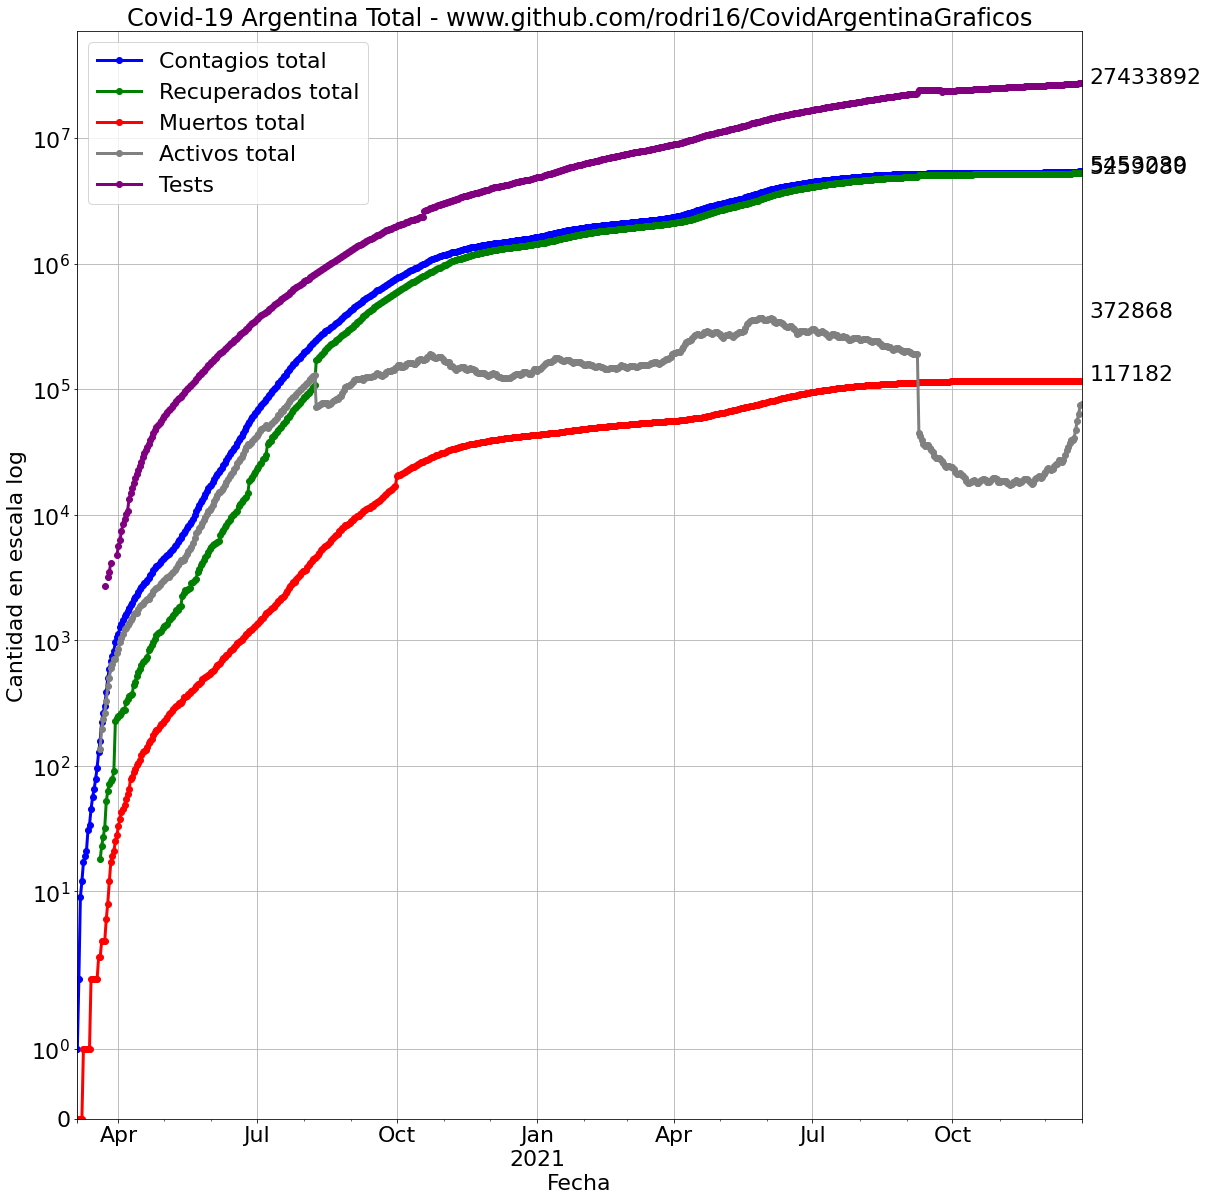

In [11]:
import matplotlib.ticker as mticker
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot',"Activos_tot","Tests"],color=['blue',"green",'red','grey','purple'],logy="sym", style='-',grid='on',figsize=(18,20),fontsize=22,linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)
plt.xlabel('Fecha', fontsize=22)
plt.ylabel('Cantidad en escala log', fontsize=22)
plt.legend(['Contagios total','Recuperados total','Muertos total',"Activos total","Tests"],loc='upper left', fontsize=22);
#ax.yaxis.set_major_formatter(mticker.ScalarFormatter())


for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot,df.Activos_tot,df.Tests):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points', fontsize=22)

plt.gca().set_ylim(bottom=0)

name='Graficos/2021/Diciembre/Contagios_totTests_log'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Subplots de los totales

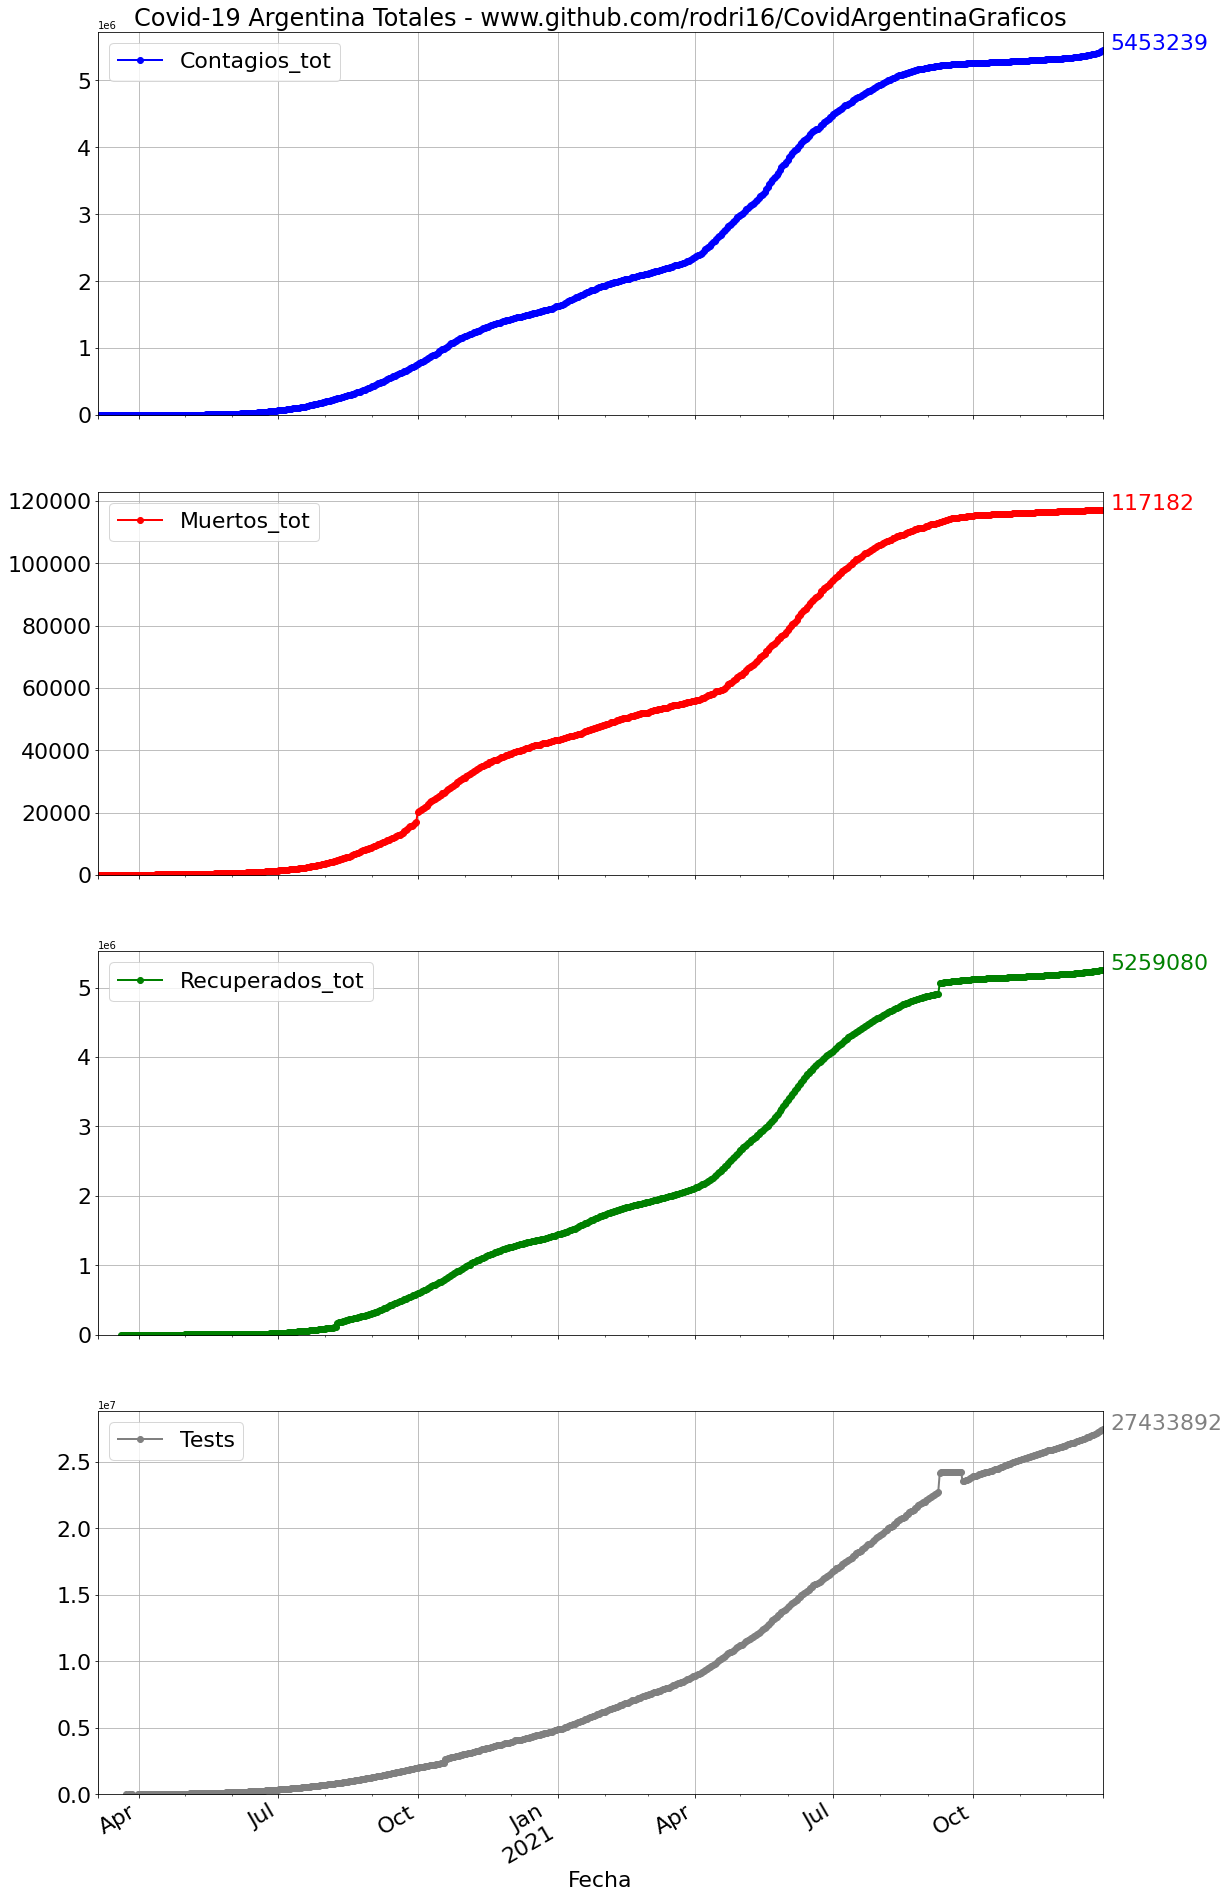

In [12]:
ax=df.plot(y=['Contagios_tot','Muertos_tot', 'Recuperados_tot',"Tests"],color=['blue','red','green','grey'],figsize=(18,36),subplots='true',style='.-',grid='on',linewidth=2, marker='o',fontsize=22)#df[df['Contagios_tot'] > 100]

plt.xlabel('Fecha', fontsize=22)

ax[0].set_title('Covid-19 Argentina Totales - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)

ax[0].annotate('%d' % df.Contagios_tot.iloc[-1], xy=(1, df.Contagios_tot.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="blue")  
ax[0].set_ylim(bottom=0)
ax[0].legend(fontsize=22)

ax[1].annotate('%d' % df.Muertos_tot.iloc[-1], xy=(1, df.Muertos_tot.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="red") 
ax[1].set_ylim(bottom=0)
ax[1].legend(fontsize=22)

ax[2].annotate('%d' % df.Recuperados_tot.iloc[-1], xy=(1, df.Recuperados_tot.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="green") 
ax[2].set_ylim(bottom=0)
ax[2].legend(fontsize=22)

ax[3].annotate('%d' % df.Tests.iloc[-1], xy=(1, df.Tests.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="grey") 
ax[3].set_ylim(bottom=0)
ax[3].legend(fontsize=22)

name='Graficos/2021/Diciembre/Todos_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Relacion entre nuevos contagios y gente testeada

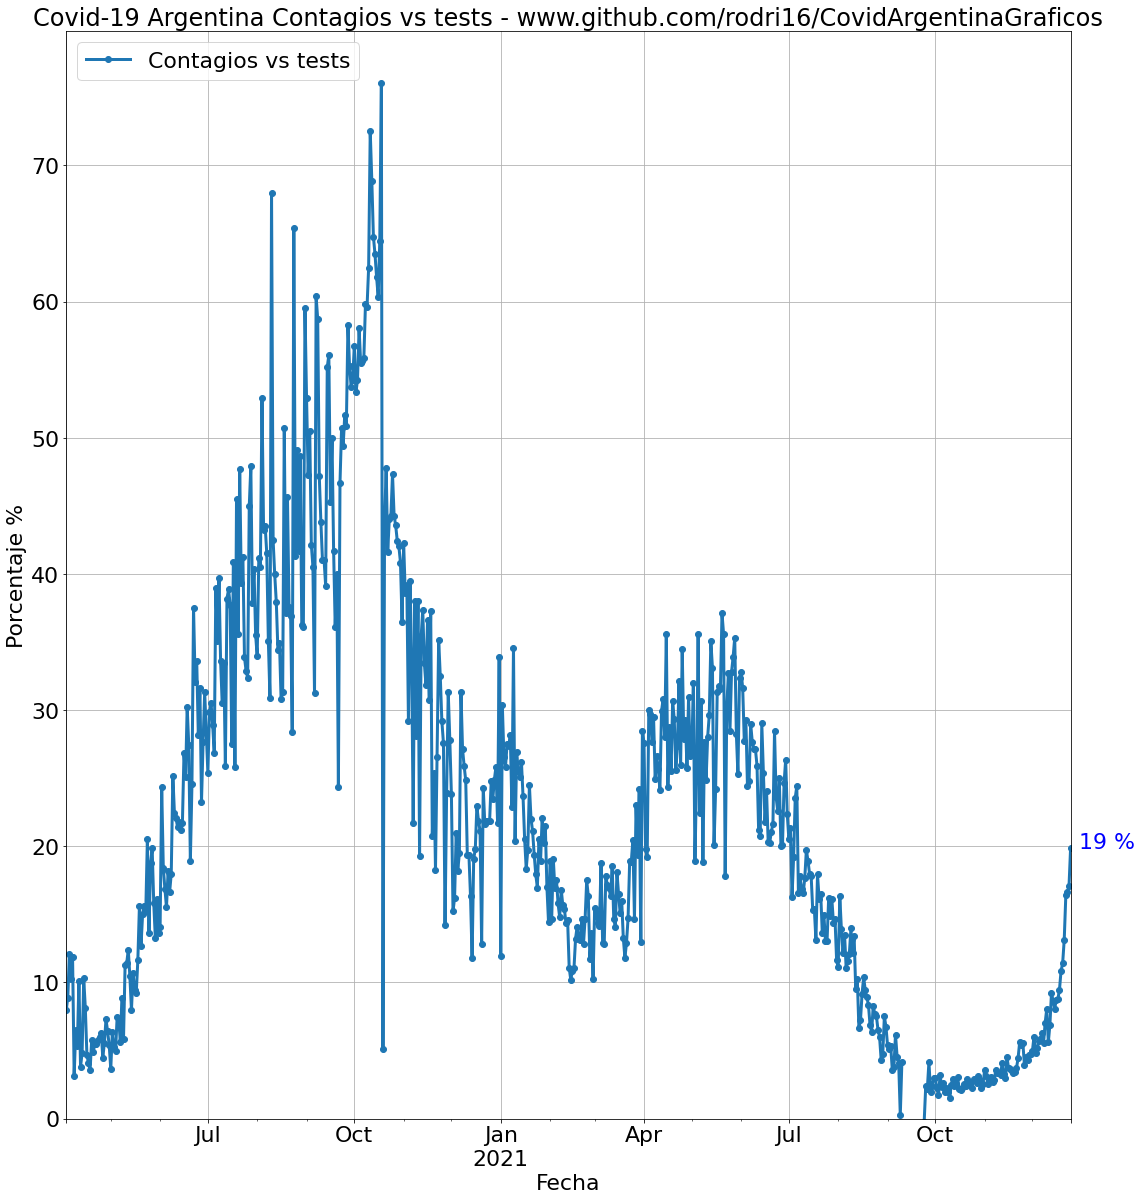

In [13]:
df['cont_test']=df['Contagios']/df['Tests_diario']*100
df[df.index > '2020-4-2']['cont_test'].plot(legend='true',style='-',grid='on',figsize=(18,20),linewidth=3, marker='o', fontsize=22)
plt.title('Covid-19 Argentina Contagios vs tests - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)
plt.legend(['Contagios vs tests'],loc='upper left', fontsize=22);
plt.ylabel('Porcentaje %', fontsize=22)
plt.xlabel('Fecha',fontsize=22)
plt.annotate('%d %%' % df.cont_test.iloc[-1], xy=(1, df.cont_test.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="blue") 
plt.gca().set_ylim(bottom=0)

name='Graficos/2021/Diciembre/Tasa_Cont_Test'+df.index[-1].strftime("%d%b")#+'.svg'#str(df.index[-1])+'.eps'
plt.savefig(name)

### Meto todos los datos en una tabla

In [14]:
name='csv _datos_completos/2021/Diciembre/Covid_arg_completo'+df.index[-1].strftime("%d%b")+'.csv'#str(df.index[-1])
df.to_csv(name, index=True)

In [15]:
 df.tail(5)

,Contagios,Muertos,Recuperados_tot,Tests,Recuperados,Tests_diario,Activos,Contagios_tot,Muertos_tot,Activos_tot,Contagios_MA,Recuperados_MA,Muertos_MA,Tests_diario_MA,cont_test
Fecha,,,,,,,,,,,,,,,
2021-12-21,9336,24,"5,240,512","27,153,617","2,913","71,044","6,399",5405200,117115,"47,573","5,408","2,871",19,"53,825",13
2021-12-22,11121,11,"5,243,498","27,221,412","2,986","67,795","8,124",5416321,117126,"55,697","6,309","3,041",16,"54,963",16
2021-12-23,13456,15,"5,248,682","27,302,336","5,184","80,924","8,257",5429777,117141,"63,954","7,474","3,319",15,"57,856",17
2021-12-24,16279,29,"5,253,705","27,397,741","5,023","95,405","11,227",5446056,117170,"75,181","8,992","3,593",17,"62,290",17
2021-12-25,7183,12,"5,259,080","27,433,892","5,375","36,151","1,796",5453239,117182,"76,977","9,424","4,050",17,"61,164",20


In [16]:
f2 = 'BD/vacunados.txt'    # Path to file containing the file
df1 = pd.read_csv(f2, comment='#')    # Read csv file with comma sepparation
df1.tail(10)
df1.set_index(pd.DatetimeIndex(df1['Fecha']),inplace=True)
df1.drop('Fecha', axis=1, inplace=True)
#df['Recuperados_tot'] = pd.to_numeric(df['Recuperados_tot'])

df1.tail(10) #ultimos 10 valores

,vacuna1,vacuna2,vacuna3
Fecha,,,
2021-12-16,37483922,31512824,"2,074,801"
2021-12-17,37533923,31616437,"2,113,192"
2021-12-18,37580758,31712465,"2,150,243"
2021-12-19,37606502,31774697,"2,171,444"
2021-12-20,37621512,31812248,"2,183,152"
2021-12-21,37668062,31908448,"2,216,196"
2021-12-22,37730569,32034608,"2,257,905"
2021-12-23,37803393,32156469,"2,300,773"
2021-12-24,37842682,32271263,"2,328,507"


In [17]:
df1['vacuna_total'] = df1['vacuna1']+df1['vacuna2']+df1['vacuna3'].isna().sum()

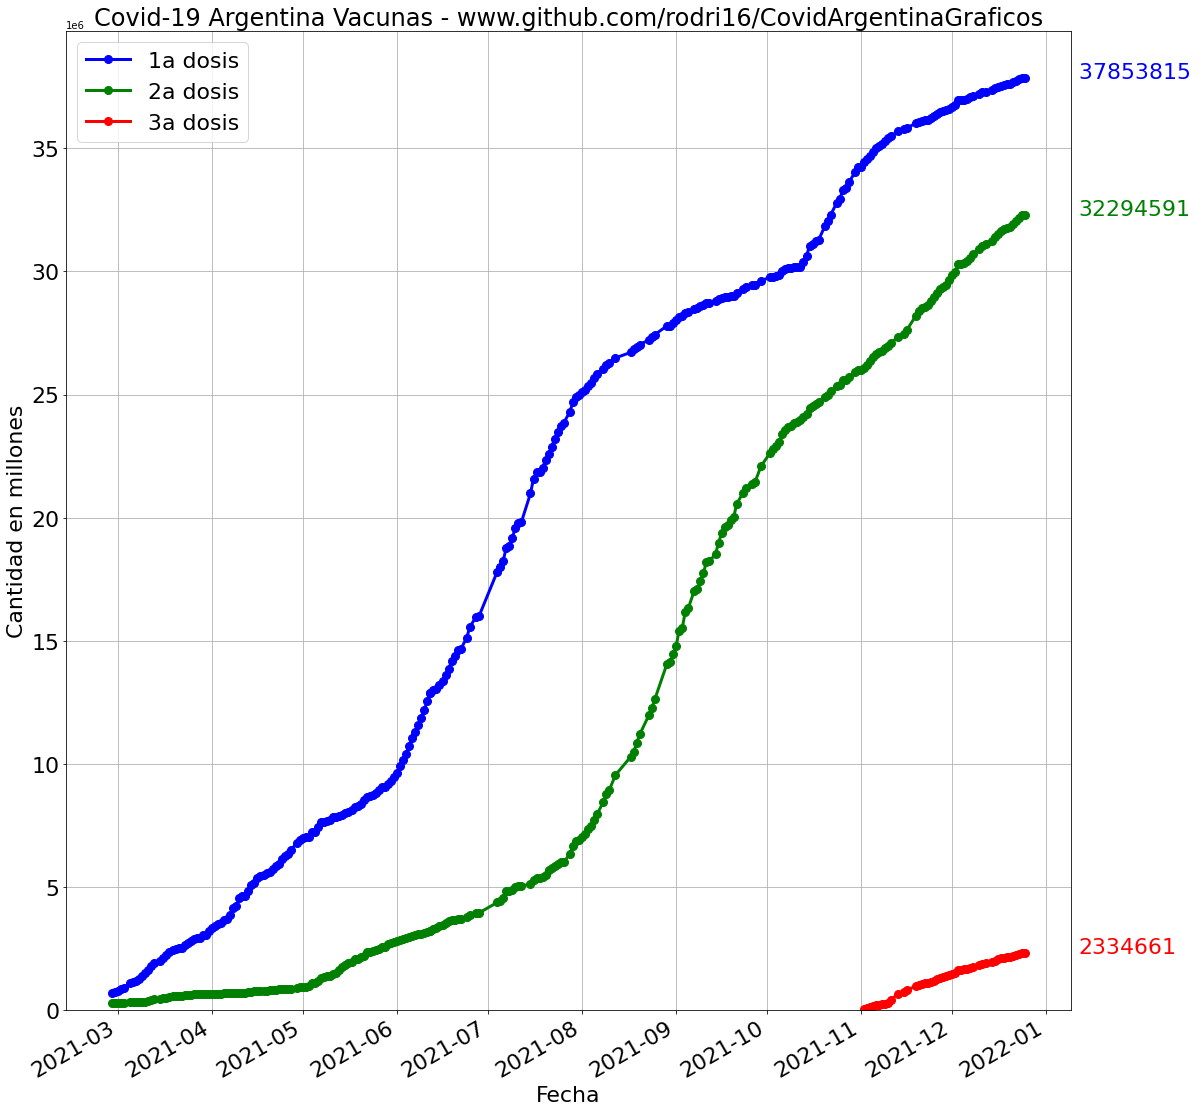

In [18]:
ax=df1.plot(y=['vacuna1','vacuna2','vacuna3'], color=['blue',"green",'red'],legend='true',style='.-',grid='on',figsize=(18,20),linewidth=3, marker='o', markersize=8, fontsize=22)

plt.title('Covid-19 Argentina Vacunas - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)
plt.legend(['1a dosis', '2a dosis','3a dosis'],loc='upper left', fontsize=22);
plt.ylabel('Cantidad en millones', fontsize=22)
plt.xlabel('Fecha', fontsize=22)
#valor minimo eje y = 0
plt.gca().set_ylim(bottom=0)
plt.ticklabel_format(axis="y", style="sci", scilimits=(6,6))
plt.annotate('%d ' % df1.vacuna1.iloc[-1], xy=(1, df1.vacuna1.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="blue") 
plt.annotate('%d' % df1.vacuna2.iloc[-1], xy=(1, df1.vacuna2.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="green")
plt.annotate('%d' % df1.vacuna3.iloc[-1], xy=(1, df1.vacuna3.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="red")

name='Graficos/2021/Diciembre/Vacunas_'+df1.index[-1].strftime("%d%b")#+'.svg'#str(df.index[-1])+'.eps'
plt.savefig(name)

In [19]:
df1['vacuna1_diario'] = df1['vacuna1'].diff()
df1['vacuna2_diario'] = df1['vacuna2'].diff()

df1["vacuna1_diario_MA"]=df1.vacuna1_diario.rolling(window=N).mean()
df1["vacuna2_diario_MA"]=df1.vacuna2_diario.rolling(window=N).mean()

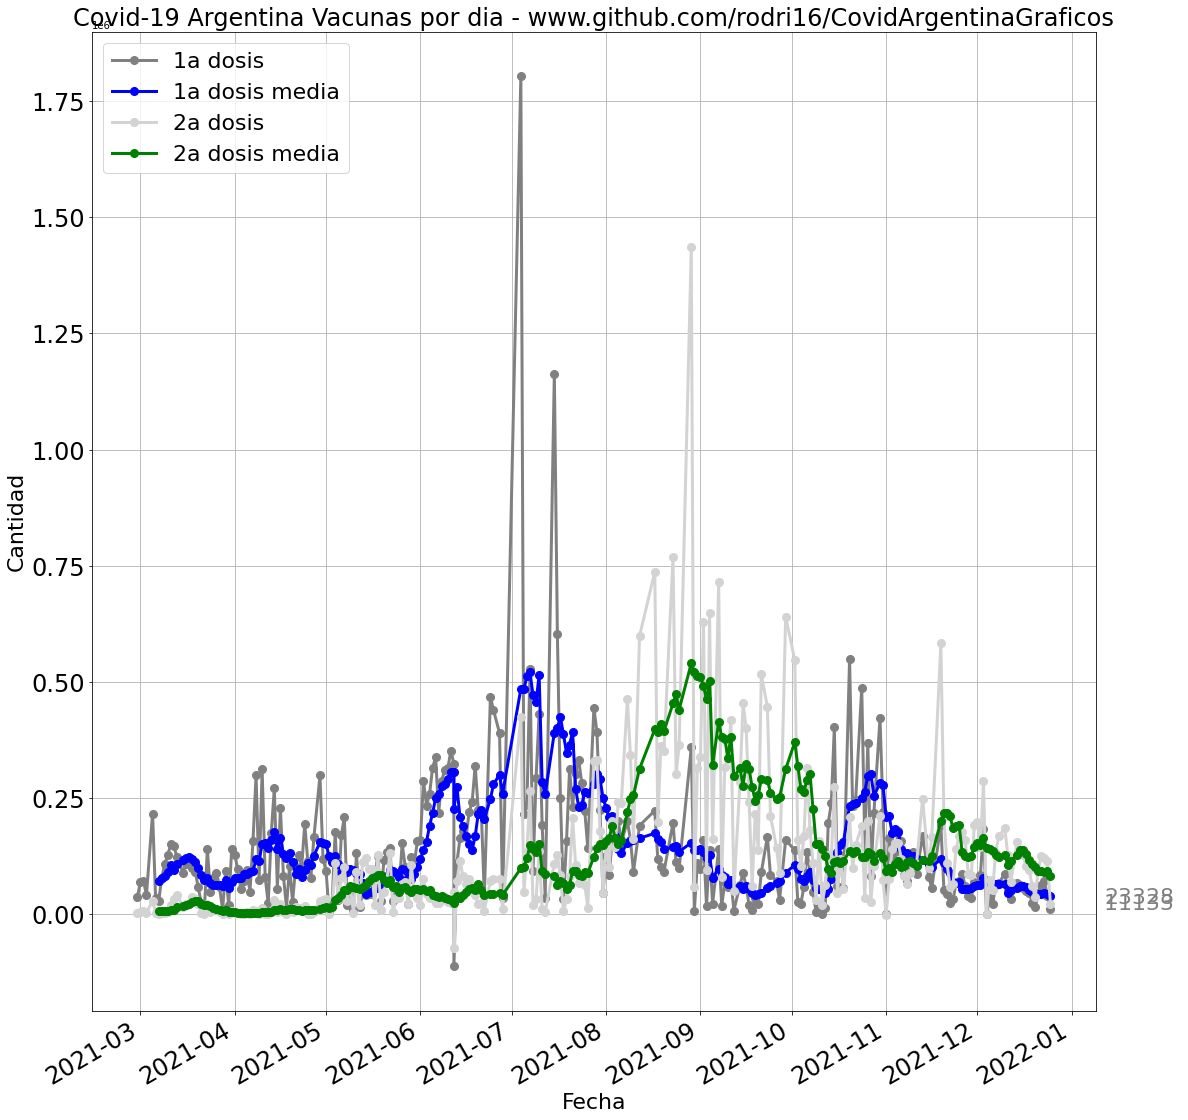

In [20]:
ax=df1.plot(y=['vacuna1_diario','vacuna1_diario_MA','vacuna2_diario','vacuna2_diario_MA'], color=['grey','blue','lightgrey',"green"],legend='true',style='.-',grid='on',figsize=(18,20),linewidth=3, marker='o', markersize=8, fontsize=24)

plt.title('Covid-19 Argentina Vacunas por dia - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)
plt.legend(['1a dosis','1a dosis media', '2a dosis','2a dosis media'],loc='upper left', fontsize=22);
plt.ylabel('Cantidad', fontsize=22)
plt.xlabel('Fecha', fontsize=22)
plt.annotate('%d ' % df1.vacuna1_diario.iloc[-1], xy=(1, df1.vacuna1_diario.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="grey") 
plt.annotate('%d' % df1.vacuna2_diario.iloc[-1], xy=(1, df1.vacuna2_diario.iloc[-1]), xytext=(8, 0), 
                xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="grey") 

name='Graficos/2021/Diciembre/Vacunas_diario_'+df1.index[-1].strftime("%d%b")#+'.svg'#str(df.index[-1])+'.eps'
plt.savefig(name)